In [1]:
import pandas as pd

In [ ]:
import pandas as pd

: 

In [2]:
## Data Ingestions step
df=pd.read_csv('data/gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619.0
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387.0
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772.0
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666.0
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453.0


In [3]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          1
price      1
dtype: int64

In [4]:
### No missing values present in the data

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108905 entries, 0 to 108904
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       108905 non-null  int64  
 1   carat    108905 non-null  float64
 2   cut      108905 non-null  object 
 3   color    108905 non-null  object 
 4   clarity  108905 non-null  object 
 5   depth    108905 non-null  float64
 6   table    108905 non-null  float64
 7   x        108905 non-null  float64
 8   y        108905 non-null  float64
 9   z        108904 non-null  float64
 10  price    108904 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 9.1+ MB


In [6]:

df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619.0
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387.0
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772.0
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666.0
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453.0


In [7]:
## Lets drop the id column
df=df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619.0
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387.0
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772.0
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666.0
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453.0


In [8]:
## check for duplicated records
df.duplicated().sum()

0

In [9]:
## segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [10]:
df[categorical_columns].describe()

,cut,color,clarity
count,108905,108905,108905
unique,5,7,8
top,Ideal,G,SI1
freq,52177,24879,30003


In [11]:
df['cut'].value_counts()

cut
Ideal        52177
Premium      27942
Very Good    21094
Good          6567
Fair          1125
Name: count, dtype: int64

In [12]:
df['color'].value_counts()

color
G    24879
E    20079
F    19313
H    17472
D    13694
I     9893
J     3575
Name: count, dtype: int64

In [13]:
df['clarity'].value_counts()

clarity
SI1     30003
VS2     26987
VS1     17288
SI2     17048
VVS2     8901
VVS1     5957
IF       2428
I1        293
Name: count, dtype: int64

In [15]:
pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached matplotlib-3.7.1-cp38-cp38-win_amd64.whl (7.6 MB)
  Using cached Pillow-9.5.0-cp38-cp38-win_amd64.whl (2.5 MB)
  Using cached kiwisolver-1.4.4-cp38-cp38-win_amd64.whl (55 kB)
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
      --------------------------------------- 0.0/1.4 MB ? eta -:--:--
      --------------------------------------- 0.0/1.4 MB ? eta -:--:--
      --------------------------------------- 0.0/1.4 MB ? eta -:--:--
      --------------------------------------- 0.0/1.4 MB ? eta -:--:--
      --------------------------------------- 0.0/1.4 MB ? eta -:--:--
      --------------------------------------- 0.0/1.4 MB ? eta -:--:--
      --------------------------------------- 0.0/1.4 MB ? eta -:--:--
      --------------------------------------- 0.0/1.4 MB ? eta -:--:--
      --------------------------------------- 0.0/1.4 MB ? eta -:--:--
      --------------------------------------

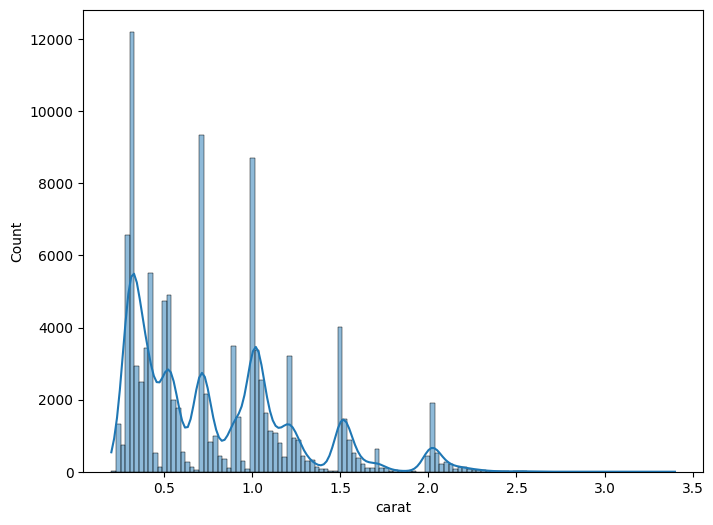

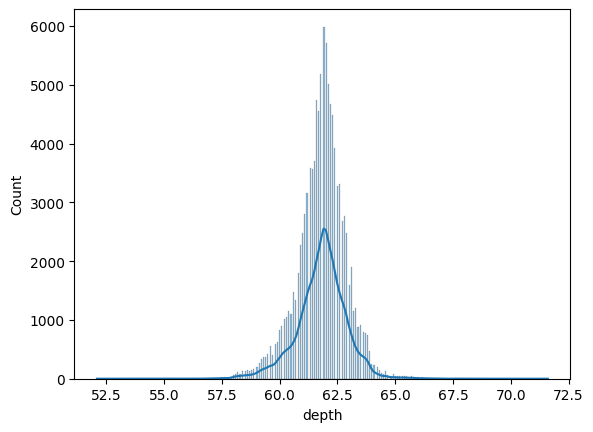

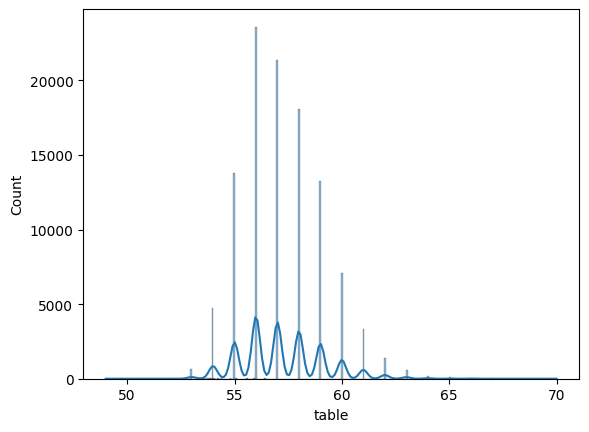

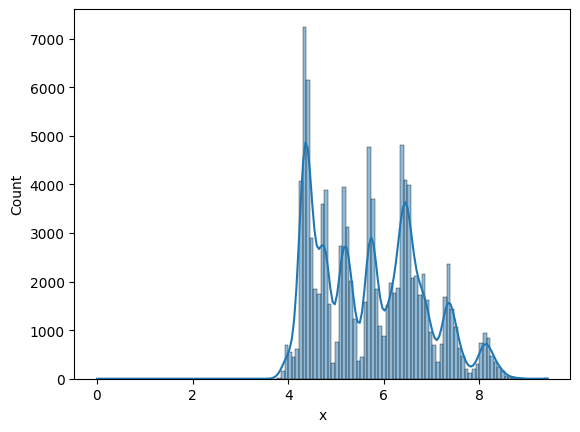

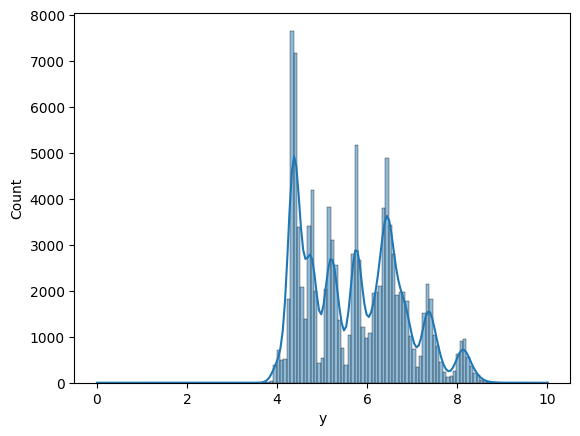

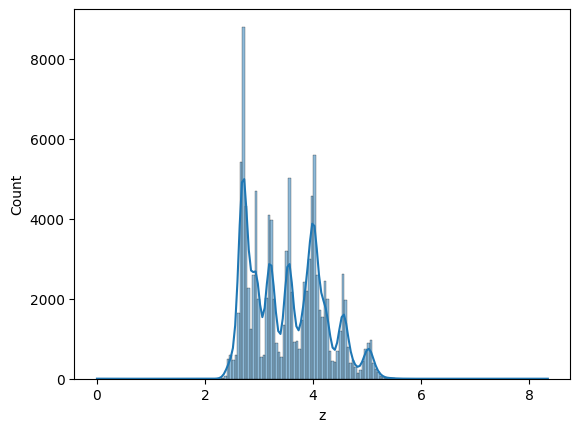

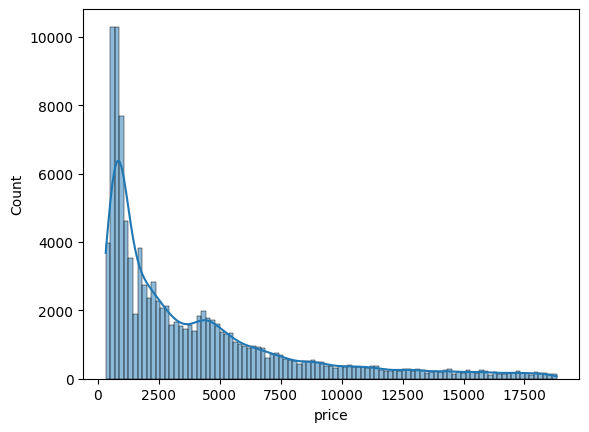

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

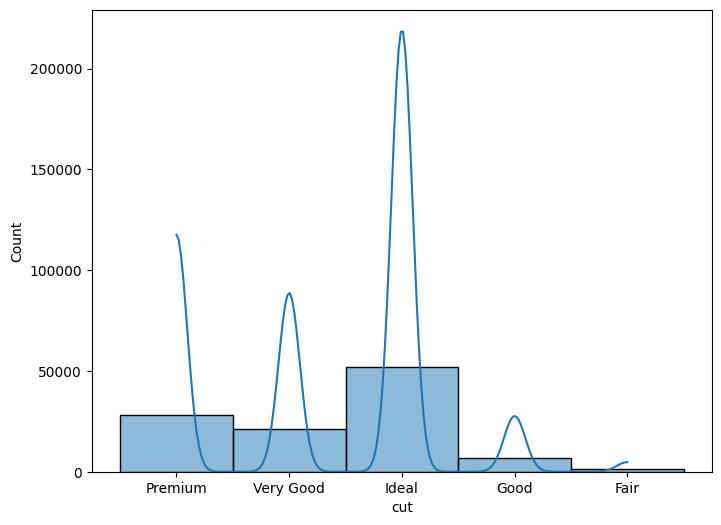

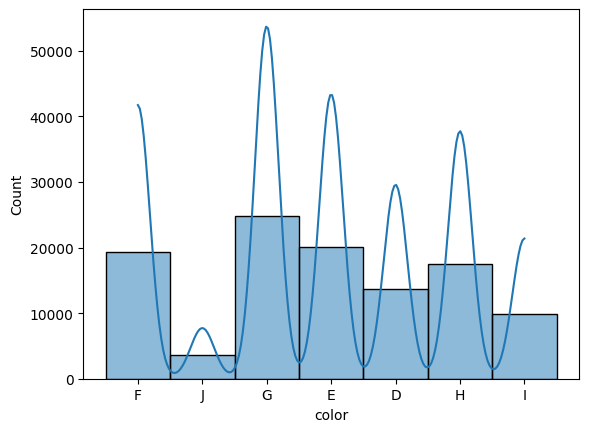

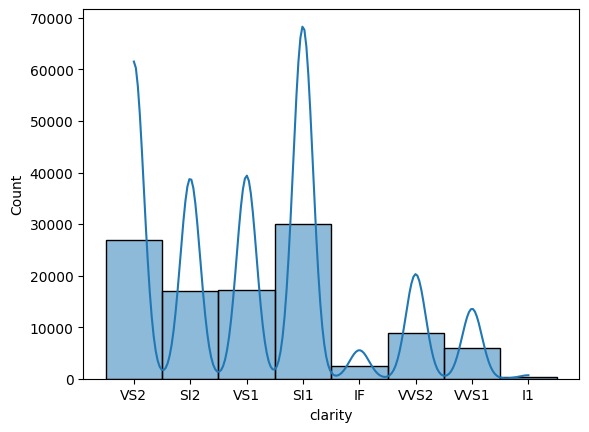

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in categorical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

In [18]:
## correlation
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'Premium'

In [19]:
##Currently we will not execute this
df.drop(labels=['x','y','z'],axis=1)

,carat,cut,color,clarity,depth,table,price
0,1.52,Premium,F,VS2,62.2,58.0,13619.0
1,2.03,Very Good,J,SI2,62.0,58.0,13387.0
2,0.70,Ideal,G,VS1,61.2,57.0,2772.0
3,0.32,Ideal,G,VS1,61.6,56.0,666.0
4,1.70,Premium,G,VS2,62.6,59.0,14453.0
...,...,...,...,...,...,...,...
108900,0.73,Very Good,J,VS2,61.6,57.0,2010.0
108901,0.54,Ideal,H,VVS1,61.9,55.0,2018.0
108902,1.14,Premium,H,SI1,61.0,59.0,5890.0
108903,0.90,Good,E,SI1,63.2,62.0,3570.0


In [20]:
df.head()


,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619.0
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387.0
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772.0
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666.0
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453.0


In [21]:

df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [22]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [23]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [24]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [25]:

df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [26]:

color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [27]:

df['cut']=df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [28]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619.0
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387.0
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772.0
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666.0
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453.0
